In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

Bruker datablad til å beregne COP som funksjon av brønntemp/utetemp

In [2]:
nan = float('nan')

databladtemp35 = np.array([-5,-2,0,2,5,10,15])
COP_data35 = np.array([3.68, 4.03, 4.23, 4.41, 4.56, 5.04, 5.42])
databladtemp45 = np.array([-2,0,2,5,10,15])
COP_data45 = np.array([3.3, 3.47, 3.61, 3.77, 4.11, 4.4])

Lineær regresjon av varmepumpens datablad (kok fra nettet)

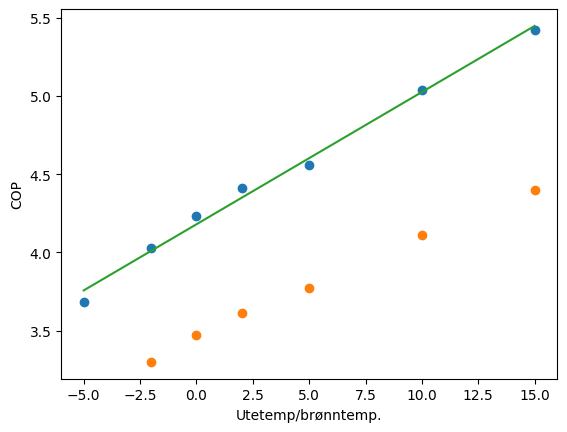

In [3]:
databladtemp35=databladtemp35.reshape((-1, 1))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(databladtemp35, COP_data35)
model = LinearRegression().fit(databladtemp35, COP_data35)
r_sq = model.score(databladtemp35, COP_data35)
y_pred = model.predict(databladtemp35)
y_pred = model.intercept_ + np.sum(model.coef_ * databladtemp35, axis=1)
#x_new = np.arange(10).reshape((-1, 2))
lin_COP_data35 = model.predict(databladtemp35)

plt.plot(databladtemp35,COP_data35,'o')
plt.plot(databladtemp45,COP_data45,'o')
plt.plot(databladtemp35,lin_COP_data35)
plt.xlabel('Utetemp/brønntemp.')
plt.ylabel('COP')
plt.show()

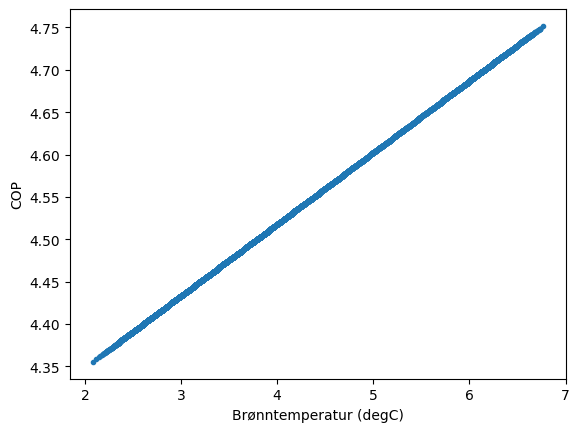

In [4]:
stigtall = (lin_COP_data35[-1]-lin_COP_data35[0])/(databladtemp35[-1]-databladtemp35[0])
konstledd = lin_COP_data35[-1]-stigtall*databladtemp35[-1]

bronntemp =[]
with open('bronntemp_eks.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter='\t')
    for row in lines:
        bronntemp.append(float(row[0]))

COP = stigtall*bronntemp+konstledd   #Her interpoleres det mellom maks. og min. verdier, i stedet for mellom de to nærmeste, som er en grov tilnærming.
plt.plot(bronntemp,COP,'.')
plt.xlabel('Brønntemperatur (degC)')
plt.ylabel('COP')
plt.show()

Ser på COP som funksjon av utetemp for luft-vann-varmepumpe

In [5]:
import pandas as pd

# Leser av Excel-fil
filnavn='Tronheim simuleringsförsök luft-vatten 94 energitäckning.xlsx'
simul_luft_vatten = pd.read_excel(filnavn, sheet_name = 'Timvärden', index_col = [0])  #Forutsetter punktum som desimaltegn
turtemp00 = np.array(simul_luft_vatten['Önskad Framledning (N)'].tolist())
cop00 = np.array(simul_luft_vatten['Total el "Thermal hourly"'].tolist())


# Setter sammen til en 2x8760 array og sorterer basert på turtemp
turtempcop00 = np.vstack((turtemp00[0:8760],cop00[0:8760]))
turtempcop00_sort = turtempcop00[np.argsort(turtempcop00[:,0])]

In [6]:
# Lineær regresjon på sorterte data
xreg = turtempcop00[0,:]
yreg = turtempcop00[1,:]

'''
xreg=xreg.reshape((-1, 1))
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xreg, yreg)
model = LinearRegression().fit(xreg, yreg)
r_sq = model.score(xreg, yreg)
y_pred = model.predict(xreg)
y_pred = model.intercept_ + np.sum(model.coef_ * xreg, axis=1)
#x_new = np.arange(10).reshape((-1, 2))
lin_cop00 = model.predict(xreg)
'''



from lin_reg import *
lin_cop00 = lin_reg(xreg,yreg)


Funksjonsuttrykket blir y= [0.1707415] x + [-1.19815355]


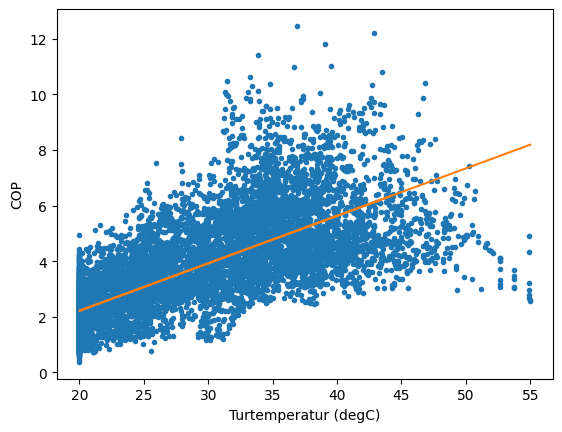

In [7]:
# Plotter:
plt.plot(turtempcop00[0,:],turtempcop00[1,:],'.')
plt.plot(turtempcop00[0,:],lin_cop00)
plt.xlabel('Turtemperatur (degC)')
plt.ylabel('COP')
plt.show()